<a href="https://colab.research.google.com/github/BhuvanSaravanan/customer_segmentation_streamlit/blob/main/107123020_Sigma_Induction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task1: Logistic Regression**

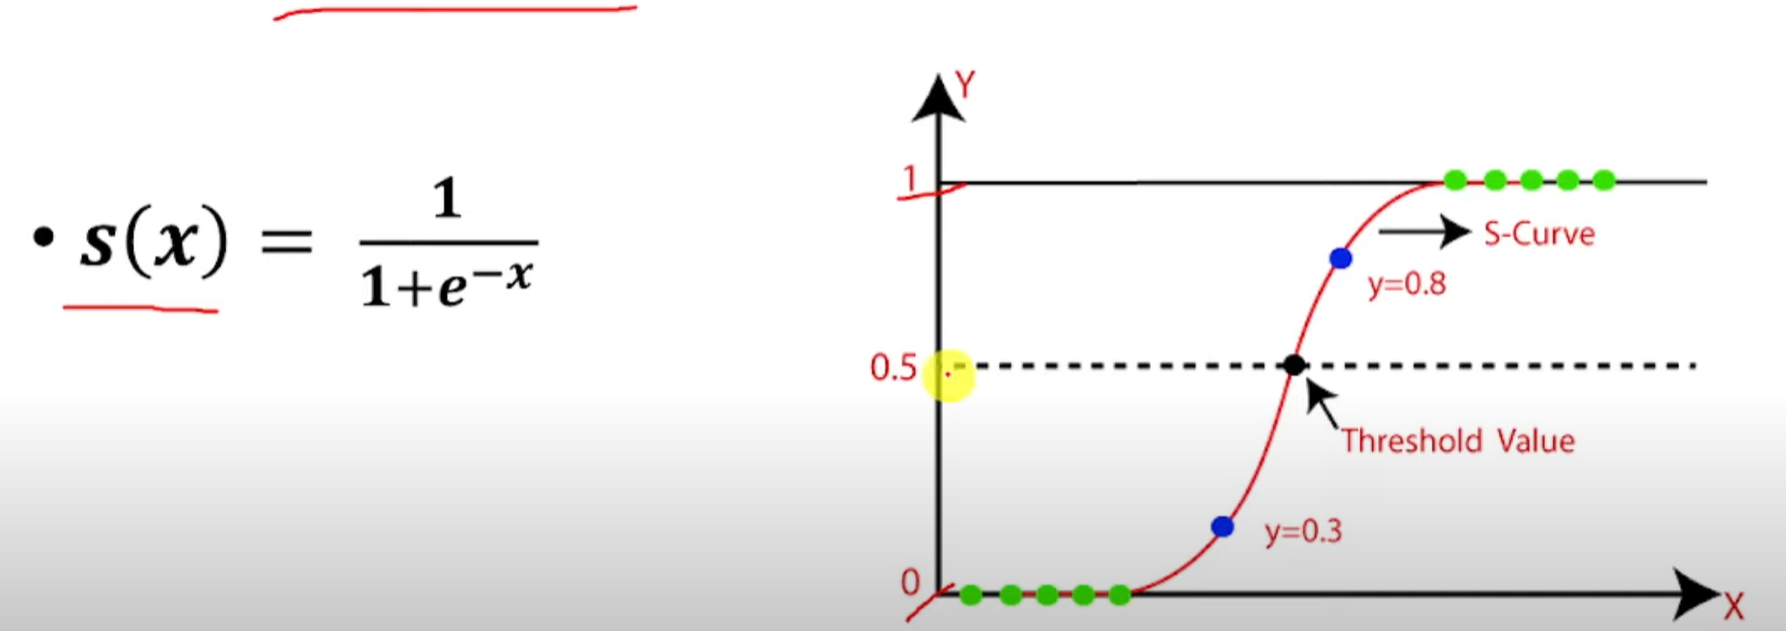

In [2]:
import numpy as np
import pandas as pd

#load the dataset
data = pd.read_csv("/content/binary_classification_dataset.csv")
X = data['feature'].values
y = data['label'].values

#initializing weights
w0 = 0.0  # bias(intercept)
w1 = 0.0  # slope(weight for feature)

 #sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


learning_rate = 0.1
epochs = 1000
threshold = 0.5

for epoch in range(epochs):
    #linear combination: w0 + w1*X
    z = w0 + w1 * X
    #sigmoid to get probabilities
    preds = sigmoid(z)
    #error: prediction - actual
    error = preds - y
    #gradient for w0: average of errors
    grad_w0 = np.sum(error) / len(X)
    #gradient for w1: average of error * X
    grad_w1 = np.sum(error * X) / len(X)


    #update weights
    w0 -= learning_rate * grad_w0
    w1 -= learning_rate * grad_w1

 #predictions
z = w0 + w1 * X
probs = 1 / (1 + np.exp(-z))
preds = (probs > threshold).astype(int)

#confusion matrix components and metrics
tp = np.sum((preds == 1) & (y == 1))  #true positives
tn = np.sum((preds == 0) & (y == 0))  # true negatives
fp = np.sum((preds == 1) & (y == 0))  #false positives
fn = np.sum((preds == 0) & (y == 1))  #false negatives

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0

print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Bias (w0):", w0)
print("Slope (w1):", w1)

True Positives (TP): 46
True Negatives (TN): 46
False Positives (FP): 4
False Negatives (FN): 4
Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1 Score: 0.92
Bias (w0): -2.3657533297623066
Slope (w1): 0.6601379097488941


# **Task2: PartA - MNIST Classification**

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
import xgboost as xgb

#load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#flatten images
X_train_flat = X_train.reshape(-1, 28*28) / 255.0
X_test_flat = X_test.reshape(-1, 28*28) / 255.0

#logistic regression
lr = LogisticRegression(max_iter=100)
lr.fit(X_train_flat, y_train)
y_pred_lr = lr.predict(X_test_flat)

#random forest
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train_flat, y_train)
y_pred_rf = rf.predict(X_test_flat)

#xgboost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_flat, y_train)
y_pred_xgb = xgb_model.predict(X_test_flat)

#svm
svm = SVC()
svm.fit(X_train_flat[:10000], y_train[:10000])  # SVM is slow, so use a subset
y_pred_svm = svm.predict(X_test_flat)

#cnn with keras
X_train_cnn = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test_cnn = X_test.reshape(-1, 28, 28, 1) / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_cnn, y_train_cat, epochs=3, batch_size=64, verbose=1)
y_pred_cnn = np.argmax(cnn.predict(X_test_cnn), axis=1)

#evaluation
def print_metrics(name, y_true, y_pred):
    print(f"{name}:")
    print("  Accuracy:", accuracy_score(y_true, y_pred))
    print("  Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("  Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("  F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    print()

print_metrics("Logistic Regression", y_test, y_pred_lr)
print_metrics("Random Forest", y_test, y_pred_rf)
print_metrics("XGBoost", y_test, y_pred_xgb)
print_metrics("SVM", y_test, y_pred_svm)
print_metrics("CNN", y_test, y_pred_cnn)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:28:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  su

Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8930 - loss: 0.3678
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9773 - loss: 0.0763
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9862 - loss: 0.0462
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Logistic Regression:
  Accuracy: 0.9257
  Precision: 0.9256049032398667
  Recall: 0.9257
  F1 Score: 0.925562366644656

Random Forest:
  Accuracy: 0.9682
  Precision: 0.9681741239777383
  Recall: 0.9682
  F1 Score: 0.9681668964925064

XGBoost:
  Accuracy: 0.9795
  Precision: 0.9795217765416181
  Recall: 0.9795
  F1 Score: 0.9795008778306383

SVM:
  Accuracy: 0.9594
  Precision: 0.9594079577913368
  Recall: 0.9594
  F1 Score: 0.959315430321888

CNN:
  Accuracy: 0.9845
  Precision: 0.9846168065893457
  Recall: 0.9845
  F1 Score: 0.984505008851602



# **Task2: PartB - MNIST NN**

In [13]:
import numpy as np
import pandas as pd

#load data
train = pd.read_csv('/content/mnist_train.csv')
test = pd.read_csv('/content/mnist_test.csv')

X_train = train.iloc[:, 1:].values / 255.0
y_train = train.iloc[:, 0].values
X_test = test.iloc[:, 1:].values / 255.0
y_test = test.iloc[:, 0].values

#one-hot-encoding
def one_hot(y, num_classes=10):
    return np.eye(num_classes)[y]

y_train_oh = one_hot(y_train)
y_test_oh = one_hot(y_test)

#network sizes
input_size = 784
hidden_size = 64
output_size = 10

#initialize weights
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)
b1 = np.zeros((1, hidden_size))
b2 = np.zeros((1, output_size))

#activation functions
def relu(x):
    return np.maximum(0, x)

def relu_deriv(x):
    return (x > 0).astype(float)

def softmax(x):
    exp = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp / np.sum(exp, axis=1, keepdims=True)

#training loop
lr = 0.01
epochs = 1000
for epoch in range(epochs):
    #forward
    z1 = X_train @ W1 + b1
    a1 = relu(z1)
    z2 = a1 @ W2 + b2
    a2 = softmax(z2)

    #loss (cross-entropy)
    loss = -np.mean(np.sum(y_train_oh * np.log(a2 + 1e-8), axis=1))

    #backward
    dz2 = a2 - y_train_oh
    dW2 = a1.T @ dz2 / len(X_train)
    db2 = np.sum(dz2, axis=0, keepdims=True) / len(X_train)
    da1 = dz2 @ W2.T
    dz1 = da1 * relu_deriv(z1)
    dW1 = X_train.T @ dz1 / len(X_train)
    db1 = np.sum(dz1, axis=0, keepdims=True) / len(X_train)

    #update
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

    if (epoch+1) % 50 == 0 or epoch == 0:
      print(f"Epoch {epoch+1}, Loss: {loss:.4f}")

#accuracy
z1 = X_test @ W1 + b1
a1 = relu(z1)
z2 = a1 @ W2 + b2
a2 = softmax(z2)
preds = np.argmax(a2, axis=1)
acc = np.mean(preds == y_test)
print(f"Test accuracy: {acc:.4f}")

Epoch 1, Loss: 2.4196
Epoch 50, Loss: 1.9683
Epoch 100, Loss: 1.6338
Epoch 150, Loss: 1.3539
Epoch 200, Loss: 1.1422
Epoch 250, Loss: 0.9901
Epoch 300, Loss: 0.8803
Epoch 350, Loss: 0.7991
Epoch 400, Loss: 0.7372
Epoch 450, Loss: 0.6885
Epoch 500, Loss: 0.6493
Epoch 550, Loss: 0.6171
Epoch 600, Loss: 0.5901
Epoch 650, Loss: 0.5672
Epoch 700, Loss: 0.5475
Epoch 750, Loss: 0.5304
Epoch 800, Loss: 0.5153
Epoch 850, Loss: 0.5019
Epoch 900, Loss: 0.4899
Epoch 950, Loss: 0.4791
Epoch 1000, Loss: 0.4693
Test accuracy: 0.8843


# **Task3: Customer Segmentation**


Streamlit App: https://sigmacustomersegmentation.streamlit.app/

GitHub: https://github.com/BhuvanSaravanan/customer_segmentation_streamlit

please check the code for the Task3 in the github repo under the app.py